In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit

pressures = [40, 82, 119, 160, 201]

Pa = 133.322

ATM = 751 * Pa
T = 299
MuHe = 4 * 10**(-3)
R = 8.31
kBolts = 1.38 * 10**(-23)

dp = 392.266

titles = ["P, Pa", "dP", "D", "dD"]

data = []

for pressure in pressures:
    file_name = "mnk{}.csv".format(pressure)
    data_table = pd.read_csv(file_name).to_numpy()

    D = data_table[0, 0]
    dD = data_table[0, 1]

    data.append([pressure * Pa, dp, D, dD])

results = pd.DataFrame(data, columns = titles)
results.to_csv("D(p).csv", index = False)


In [18]:
def make_plot():
    global ATM, T, MuHe, R, kBolts

    file_name = "D(p).csv"
    data_table = pd.read_csv(file_name).to_numpy()

    x_raw = data_table[:, 0]
    x = [1 / i for i in x_raw]
    y = data_table[:, 2]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $P(1/P)$".format(pressure))
    plt.ylabel(r"$D, м^2 / c$")
    plt.xlabel(r"$1/P, Па^{-1}$")

    def func(x, k, b):
        return x * k + b

    popt, pcov = curve_fit(func, x, y)
    k, b = popt
    dk, db = np.sqrt(np.diag(pcov))

    x_lin = np.linspace(0, x[0] + 0.00001, 1000)
    plt.plot(x_lin, func(x_lin, k, b), "b", label = "Линейная аппроксимация")
    plt.errorbar(x, y, markersize = 15, fmt = 'r.', markerfacecolor = 'r', label = 'Экспериментальные значения')
    plt.errorbar(1 / ATM, 0.62 * 10**(-4), markersize = 15, fmt = 'g.', markerfacecolor = 'g', label = 'Табличное значение при атмосферном давлении')

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/D(p^-1).png")
    plt.show()

    D_atm = func(1 / ATM, k, b)

    print("D_atm = {}".format(D_atm))

    print("dD_atm = {}".format(db))

    lambda_He = 3 * D_atm * np.sqrt(3.14 * MuHe / (8 * R * T))
    sigma_He = kBolts * T / (ATM * lambda_He)

    print("\\lamda_He = {}".format(lambda_He))
    print("\\sigma_He = {}".format(sigma_He))




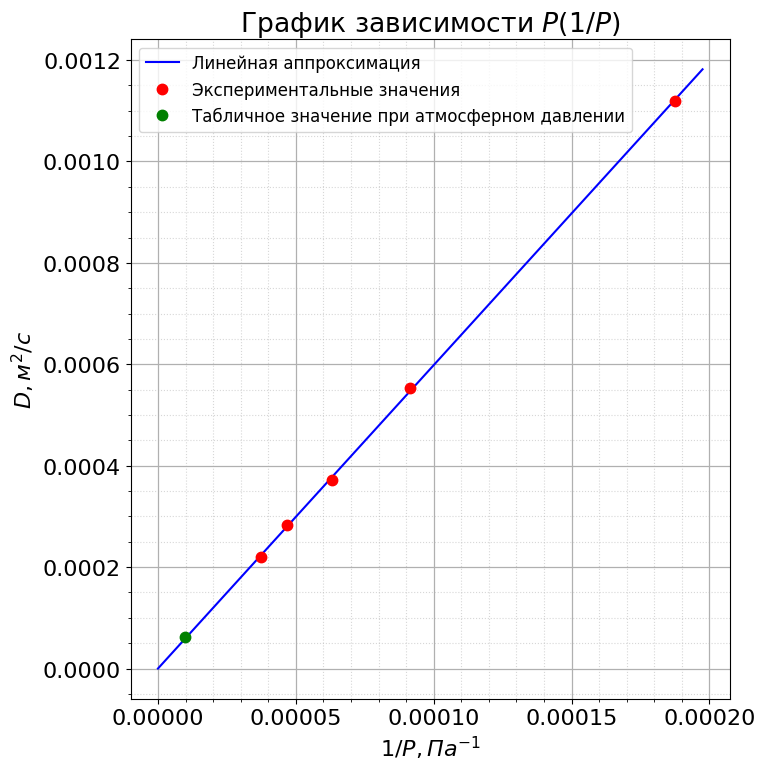

D_atm = 5.970155707994831e-05
dD_atm = 4.38323823280908e-06
\lamda_He = 1.42370704147278e-07
\sigma_He = 2.894595513974054e-19


In [19]:
make_plot()